In [2]:
#importing pytorch and device agnostic code 
import torch 
from torch import nn

torch.__version__

'2.6.0+cu126'

In [3]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
#get data 
#food101 (pizza steak sushi used here , along with 10% of images)

import requests
import zipfile 
from pathlib import Path
data_path = Path(r"C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata")
image_path=data_path/ "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path}directory exists")
else:
    print(f"DNE , creating one ")
    image_path.mkdir(parents=True, exist_ok=True)

#download
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    # Use the raw file URL for direct download
    request = requests.get("https://github.com/LadakaTayaara/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("downloading pizza,steak and sushi data")
    f.write(request.content)

#unzip the file
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("unzipping ")
    zip_ref.extractall(image_path)

C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushidirectory exists
downloading pizza,steak and sushi data
unzipping 


In [5]:
import os 
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_dir(image_path)

there are 2 directories and 0 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi'
there are 3 directories and 0 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test'
there are 0 directories and 25 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\pizza'
there are 0 directories and 19 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\steak'
there are 0 directories and 31 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\sushi'
there are 3 directories and 0 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\train'
there are 0 directories and 78 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\train\pizza'
there are

In [6]:
#setup train and testing paths 
train_dir=image_path/"train"
test_dir=image_path/"test"

train_dir,test_dir

(WindowsPath('C:/Users/Abhinandan Singh/Desktop/AI & ML/pythonpract/mynotebooks/mydata/pizza_steak_sushi/train'),
 WindowsPath('C:/Users/Abhinandan Singh/Desktop/AI & ML/pythonpract/mynotebooks/mydata/pizza_steak_sushi/test'))

C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\pizza\416067.jpg
pizza
Random image path: C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\pizza\416067.jpg
Image class: pizza
Image height: 512
Image width: 512


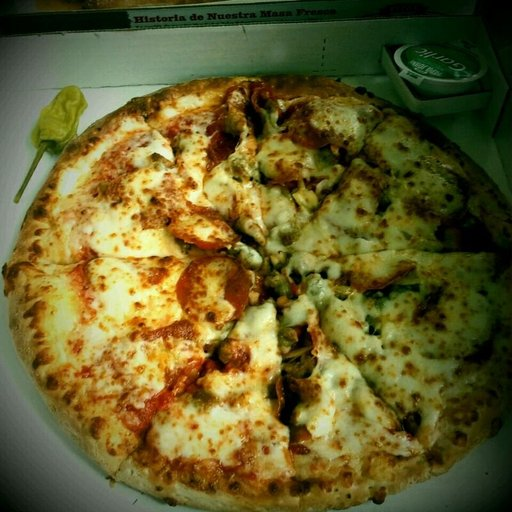

In [7]:
#visualizing the image
import random
from PIL import Image

random.seed(69)

#get all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))  # fetches every path and puts it all together in a list

#pick a random image path 
random_image_path= random.choice(image_path_list)
print(random_image_path)

#get image class from path name (name of the folder/directory)
image_class=random_image_path.parent.stem
print(image_class)

#4.open image
img=Image.open(random_image_path)

#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

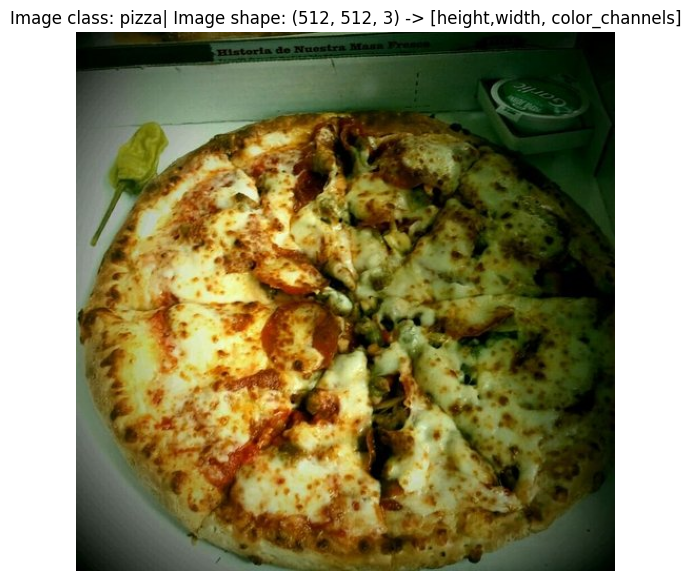

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

#turn the image into an array 
img_as_array=np.asarray(img)

#plot the image with matplotlib 
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class}| Image shape: {img_as_array.shape} -> [height,width, color_channels]")
plt.axis(False)

In [9]:
img_as_array 

array([[[1, 1, 0],
        [1, 1, 0],
        [1, 2, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 0],
        [1, 1, 0],
        [2, 3, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 2, 0],
        [1, 3, 0],
        [1, 3, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 1, 0],
        [0, 2, 1],
        [0, 2, 1],
        ...,
        [0, 3, 0],
        [0, 2, 0],
        [0, 2, 0]],

       [[0, 1, 3],
        [0, 1, 3],
        [0, 2, 1],
        ...,
        [0, 2, 0],
        [0, 2, 0],
        [0, 2, 0]],

       [[0, 1, 3],
        [0, 1, 3],
        [0, 2, 1],
        ...,
        [0, 2, 0],
        [0, 2, 0],
        [0, 2, 0]]], shape=(512, 512, 3), dtype=uint8)

In [10]:
#transforming data , getting data into tensor format 
import torch 
from torch.utils.data import dataloader
from torchvision import datasets, transforms 

## 3.1 transforming data with transform from torchvision 

#function to transform the incoming data 
data_transform = transforms.Compose([#photoshop ahh module
    #resize the images to 64x64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5),#probability of flipping horizontally 
    transforms.ToTensor()#converts a PIL or numpy array to tensor 
])#takes in a list 

data_transform(img) 


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0588, 0.0118, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0510, 0.0196, 0.0039],
         [0.0000, 0.0039, 0.0039,  ..., 0.0078, 0.0039, 0.0039],
         ...,
         [0.0235, 0.0431, 0.0745,  ..., 0.1137, 0.0824, 0.0510],
         [0.0078, 0.0196, 0.0431,  ..., 0.0824, 0.0471, 0.0157],
         [0.0000, 0.0039, 0.0157,  ..., 0.0549, 0.0196, 0.0039]],

        [[0.0000, 0.0000, 0.0039,  ..., 0.0902, 0.0549, 0.0275],
         [0.0078, 0.0078, 0.0039,  ..., 0.0902, 0.0627, 0.0431],
         [0.0157, 0.0118, 0.0078,  ..., 0.0275, 0.0275, 0.0157],
         ...,
         [0.0588, 0.0902, 0.1255,  ..., 0.1412, 0.1098, 0.0824],
         [0.0392, 0.0667, 0.0980,  ..., 0.1098, 0.0784, 0.0510],
         [0.0196, 0.0392, 0.0667,  ..., 0.0824, 0.0471, 0.0235]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0549, 0.0157, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0471, 0.0196, 0.0078],
         [0.0000, 0.0000, 0.0039,  ..., 0.0039, 0.0000, 0.

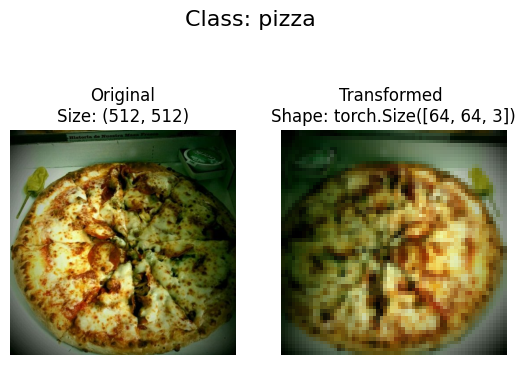

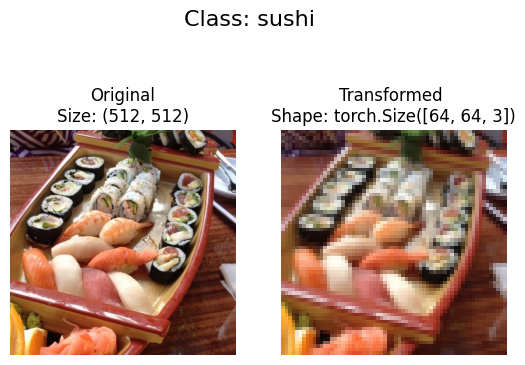

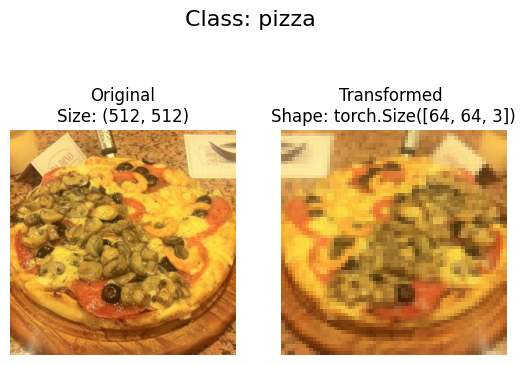

In [11]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):#n is number of image i want to plot
    """selects random images from a path of images and loads/transforms them then plots the original vs the transformed version"""
    if seed:
        random.seed(seed)
    random_image_paths= random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            #transform and plot target image 
            transformed_image = transform(f).permute(1,2,0)#we will need to change shape for matplotlib
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=69)

In [12]:
# option 1 : loading image data using ImageFolder using torchvision.datasets.ImageFolder
from torchvision import datasets 
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,#transform for data
                                  target_transform=None)#transform for label 

test_data= datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,#transform for data
                                  target_transform=None)#transform for label
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
#Get class name as a list 
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
#get class names as dict 
class_dict = train_data.class_to_idx,
class_dict

({'pizza': 0, 'steak': 1, 'sushi': 2},)

In [15]:
#check the length of dataset 
len(train_data), len(test_data)

(225, 75)

In [16]:
# rearrange order dimension
img_tensor = data_transform(img)  # convert PIL image to tensor (C, H, W)
img_permute = img_tensor.permute(1, 2, 0)  # (H, W, C)

img_tensor.shape, img_permute.shape

(torch.Size([3, 64, 64]), torch.Size([64, 64, 3]))

Text(0.5, 1.0, 'pizza')

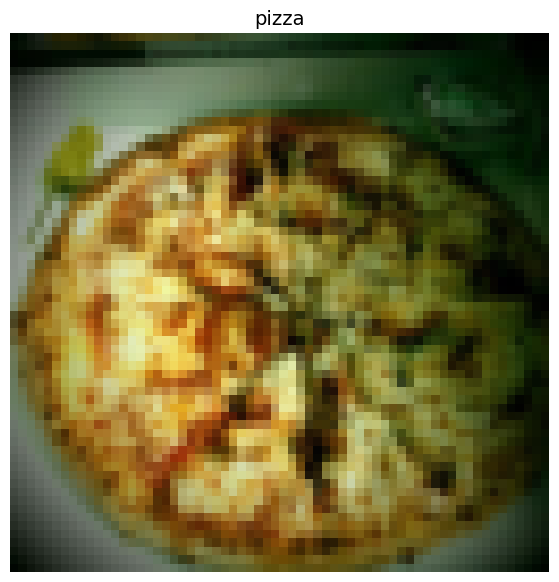

In [17]:
img,label=train_data[0][0], train_data[0][1]
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [18]:
#turn data/images into dataloders 
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=2,#number of CPU cores used to load your data
                            shuffle=True)
test_dataloader= DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=2,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x237c1addeb0>,
 <torch.utils.data.dataloader.DataLoader at 0x237ca306d20>)

In [19]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [20]:
img, label = next(iter(train_dataloader))

#batch size will now be 1 
print(f"image shape: {img.shape} -> [batch size, color channel , height , width]")
print(f"Label shpe: {label.shape}")

image shape: torch.Size([32, 3, 64, 64]) -> [batch size, color channel , height , width]
Label shpe: torch.Size([32])


In [21]:
#alternate option : loading image data with a custom "dataset"
#with ts , you can create a dataset out of almost everything as far as the code is correct , and you are not limited to pytorc prebuilt dataset functions 
import os 
import pathlib 
import torch 

from PIL import Image 
from torch.utils.data import Dataset
from torchvision import transforms 
from typing import Tuple, Dict, List

#functions which fetches class names as a list along with indexes in a dictionary , checks if the class exists and returns errors if there are any 

#setup path directory 
target_directory= train_dir
print(f"Target dir: {target_directory}")

#get class names
class_names_found=sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [22]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [23]:
def find_classes(directory:str)-> Tuple[List[str],Dict[str,int]]:
    """Finds the class folder names in a target directory """
    #1. get class names with scandir 
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    #raise an error if class names could not be found 
    if not classes:
        raise FileNotFoundError(f"couldn't find any class in {directory}...")
    
    class_to_idx= {class_name:i for i , class_name in enumerate(classes)}
    return classes , class_to_idx

In [24]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [25]:
#create a custom dataset to replicate "ImageFolder"
#subclass torch.utils.data.Dataset -> init our subclass with  target directory and transform , several attributes will be created like paths transform classes and class_to_idx
#create a function to load images , this will open an image
#overwrite the len method to get the length of the dataset 
#overwrite the __getitem__ method to return a given simple when index is passed 

from torch.utils.data import Dataset

#subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    #init
    def __init__(self,targ_dir:str, transform=None):
        super().__init__()
        #create class attributes 
        #fetch all image paths 
        self.paths=list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        #setup transform functions 
        self.transform = transform
        #create classes and class to index attibutes 
        self.classes, self.class_to_idx = find_classes(targ_dir)

    #create function to load images 
    def load_image(self, index:int) -> Image.Image:
        """opens an image via a path and returns it """
        image_path=self.paths[index]
        return Image.open(image_path)
    
    #overwrite len method 
    def __len__(self)-> int:
        """Returns the total number of samples """
        return len(self.paths)
    
    #overwrite getitem method
    def __getitem__(self, index:int) -> tuple[torch.Tensor, int]:
        img=self.load_image(index)
        class_name=self.paths[index].parent.name
        class_idx=self.class_to_idx[class_name]

        #transform if necessary 
        if self.transform:
            return self.transform(img), class_idx #return data,label
        else:
            return img,class_idx

In [26]:
#create a transform
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [27]:
#test out custom imagefolder
train_data_custom=ImageFolderCustom(targ_dir=train_dir,
                                    transform=train_transforms)

test_data_custom= ImageFolderCustom(targ_dir=test_dir,
                                    transform=test_transforms)

len(train_data_custom), len(train_data)

(225, 225)

In [28]:
#check for equality between original imagefolder and custom one 
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [29]:
#create a function to disply random images 
#take in a dataset and other parameters 
#cap the number of images to see to 10 
#get a list of random sample indexes from the target dataset 
#plot with matplotlib 
#make sure dimension line up with matplotlib (HWC)

#create function to take in dataset
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n:int=10,
                          display_shape:bool = True,
                          seed:int = None):
    #cap the number to n
    if n>10:
        n=10
        display_shape= False
        print("n shouldn't be larger to 10 and removing shape dispay ")

    #set the seed 
    if seed:
        random.seed(seed)

    #get random sample indexes 
    random_samples_idx=random.sample(range(len(dataset)),k=n)

    #setup plot
    plt.figure(figsize=(16,8))

    for i,targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label= dataset[targ_sample][0],dataset[targ_sample][1]
        #adjust tensor dimension for plotting
        targ_image_adjust= targ_image.permute(1,2,0)
        #plot adjust samples
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title= f"Class: {classes[targ_label]}"
            if display_shape:
                title=title+ f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

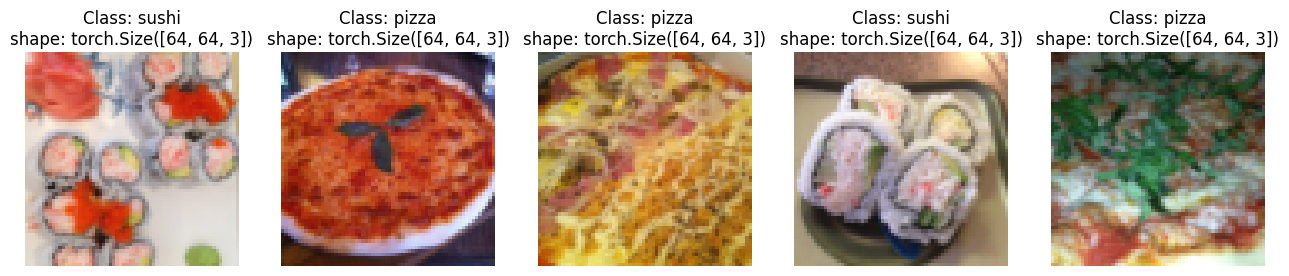

In [32]:
#display random images from imagefolder
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=69)

n shouldn't be larger to 10 and removing shape dispay 


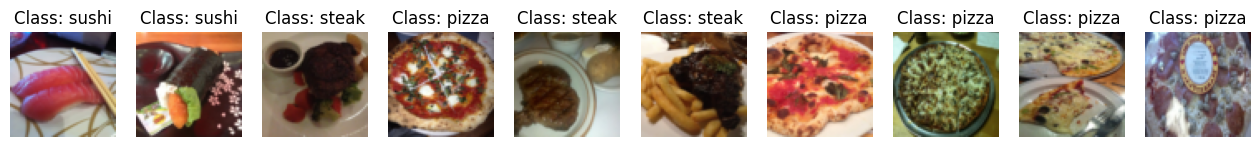

In [35]:
#display random images from the imagefoldercustom dataset
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=None)

In [39]:
#turn custom loaded images into dataloader 
from torch.utils.data import DataLoader
train_dataloader_custom= DataLoader(dataset=train_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x237cc1da150>,
 <torch.utils.data.dataloader.DataLoader at 0x237cc1d90d0>)

In [40]:
#get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape,label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))